In [31]:
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

The percentage of positive examples:0.1727485630620034
The number of negative examples:99.827251436938


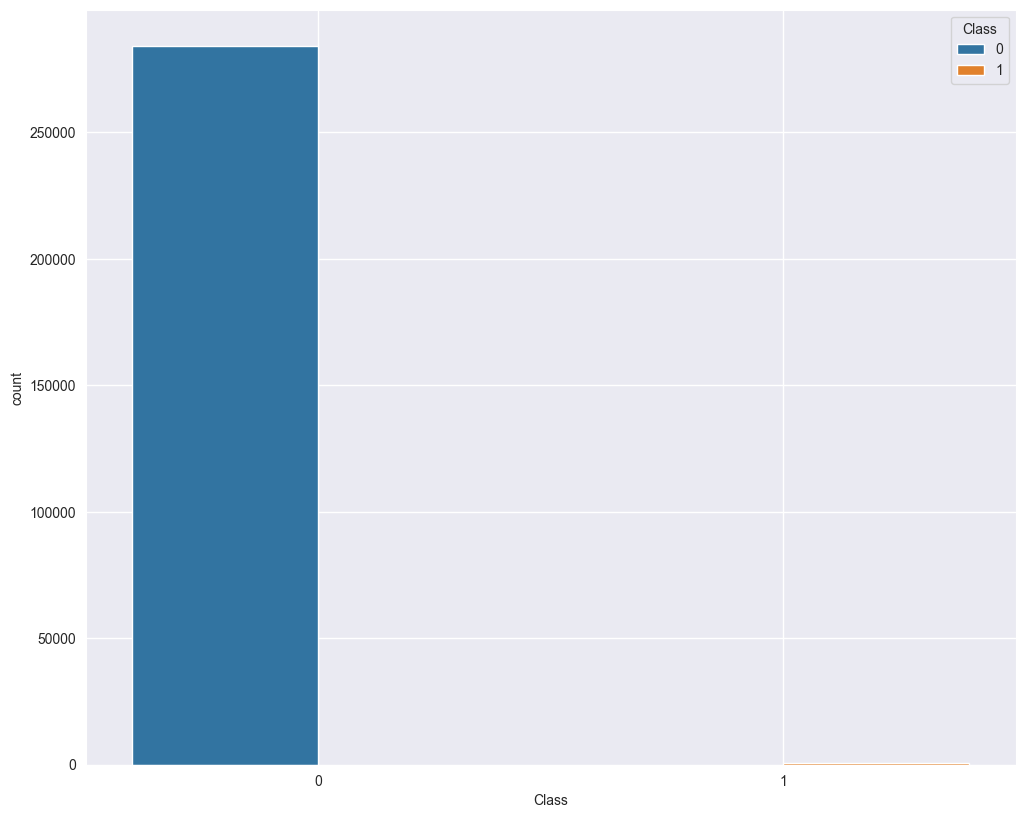

In [32]:
plt.rcParams.update({"figure.figsize": (12, 10), "font.size": 10, "figure.dpi": 100})

raw_df = pd.read_csv("creditcard.csv")
sns.set_style("dark")
sns.countplot(x="Class", data=raw_df, hue="Class")
plt.grid(linestyle='-', linewidth=1, c="w")

neg, pos = np.bincount(raw_df["Class"])
print(f"The percentage of positive examples:{pos*100/(pos+neg)}\nThe number of negative examples:{neg*100/(neg+pos)}")

In [33]:
stats = raw_df.describe()
stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
clean_df = raw_df.copy()
clean_df.pop("Time")

clean_df["Amount"] = np.log(clean_df["Amount"] + 1e-6)
clean_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989542,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816241,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248352,0


In [35]:
train_set, test_set = train_test_split(clean_df, test_size=0.2)
train_set, val_set = train_test_split(train_set, test_size=0.2)

train_labels = np.array(train_set.pop("Class"))
test_labels = np.array(test_set.pop("Class"))
val_labels = np.array(val_set.pop("Class"))

train_features = np.array(train_set)
test_features = np.array(test_set)
val_features = np.array(val_set)

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
val_features = scaler.transform(val_features)

train_features = np.clip(train_features, -5, 5)
test_features = np.clip(test_features, -5, 5)
val_features = np.clip(val_features, -5, 5)

In [36]:
pos_df = pd.DataFrame(train_features[train_labels==1], columns=train_set.columns)
neg_df = pd.DataFrame(train_features[train_labels==0], columns=train_set.columns)

In [37]:
import keras
import tensorflow as tf

BATCH_SIZE = 2048

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

model = make_model()
model.summary()

initial_bias = np.log([pos/neg])   # gives a good initial guess to our model
initial_bias_model = make_model(output_bias=initial_bias)
baseline_history =  model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=1)
initial_bias_history = initial_bias_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=1
    )

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                480       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
90/90 [==============================] - 2s 24ms/step - loss: 0.2529 - tp: 189.0000 - fp: 8973.0000 - tn: 172976.0000 - fn: 138.0000 - accuracy: 0.9500 - precision: 0.0206 - recall: 0.5780 - auc: 0.7559 - prc: 0.1002 - val_loss: 0.1227 - val_tp: 59.0000 - val_fp: 28.0000 - val_tn: 45463.0000 - val_fn: 19.0000 - val_accuracy: 0.9990 - val_precision: 0.6782 - val_recall: 0.

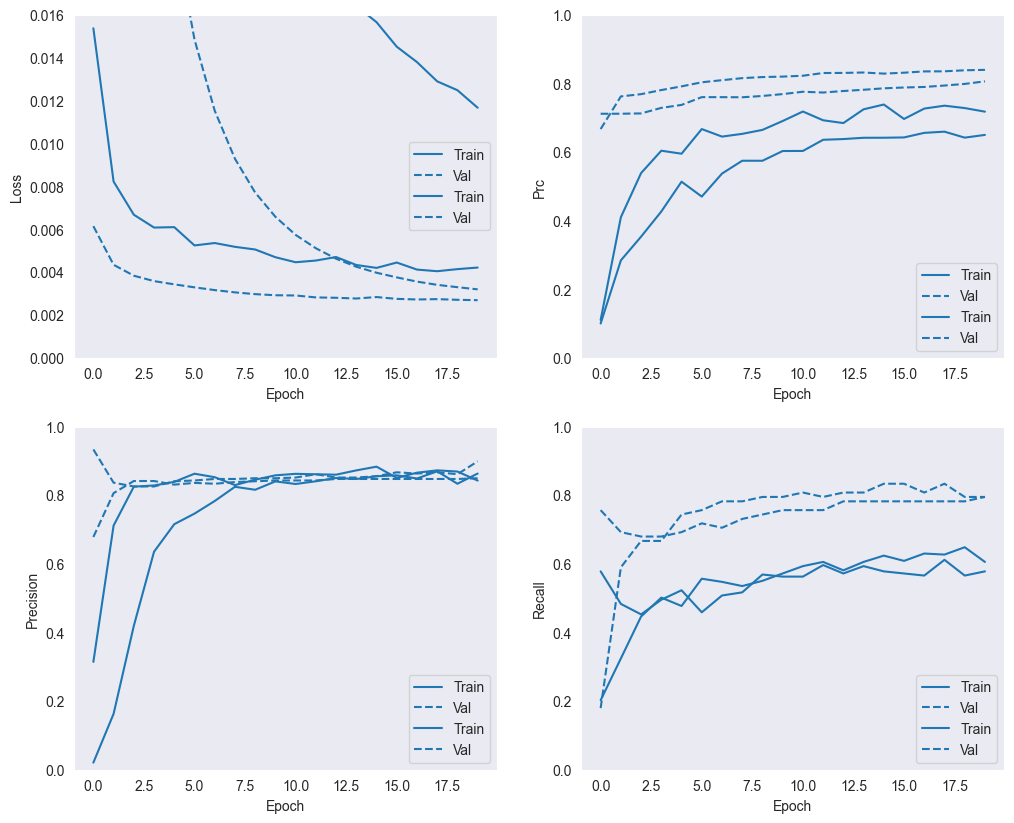

In [38]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

plot_metrics(initial_bias_history)
plot_metrics(baseline_history)

def plot_cm(y_true, y_pred, p=0.5):
    confusion_m = confusion_matrix(y_true, y_pred > p)
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_m, annot=True)
    plt.title("Confusion Matrix @ {}".format(p))
    plt.xlabel("Predicted Label")
    plt.ylabel("Real Label")

test_pred = model.predict(test_features)
test_bias_pred = initial_bias_model(test_features)


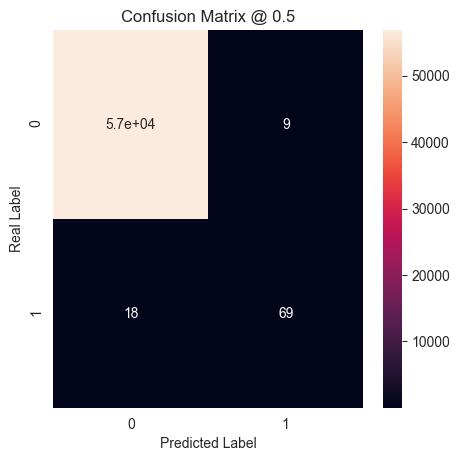

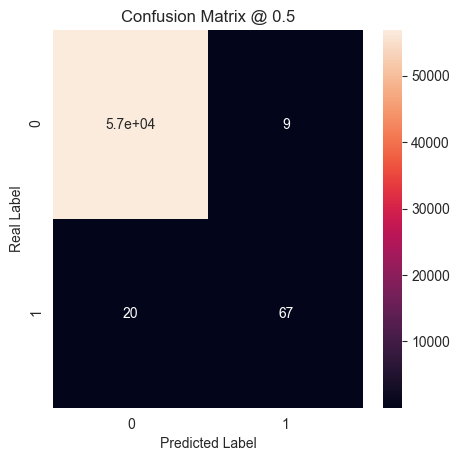

In [39]:
plot_cm(test_labels, test_pred)
plot_cm(test_labels, test_bias_pred)

Epoch 1/20
90/90 [==============================] - 2s 23ms/step - loss: 0.8747 - tp: 345.0000 - fp: 149418.0000 - tn: 78022.0000 - fn: 60.0000 - accuracy: 0.3439 - precision: 0.0023 - recall: 0.8519 - auc: 0.7850 - prc: 0.0318 - val_loss: 1.1207 - val_tp: 78.0000 - val_fp: 36730.0000 - val_tn: 8761.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.1940 - val_precision: 0.0021 - val_recall: 1.0000 - val_auc: 0.9802 - val_prc: 0.4429

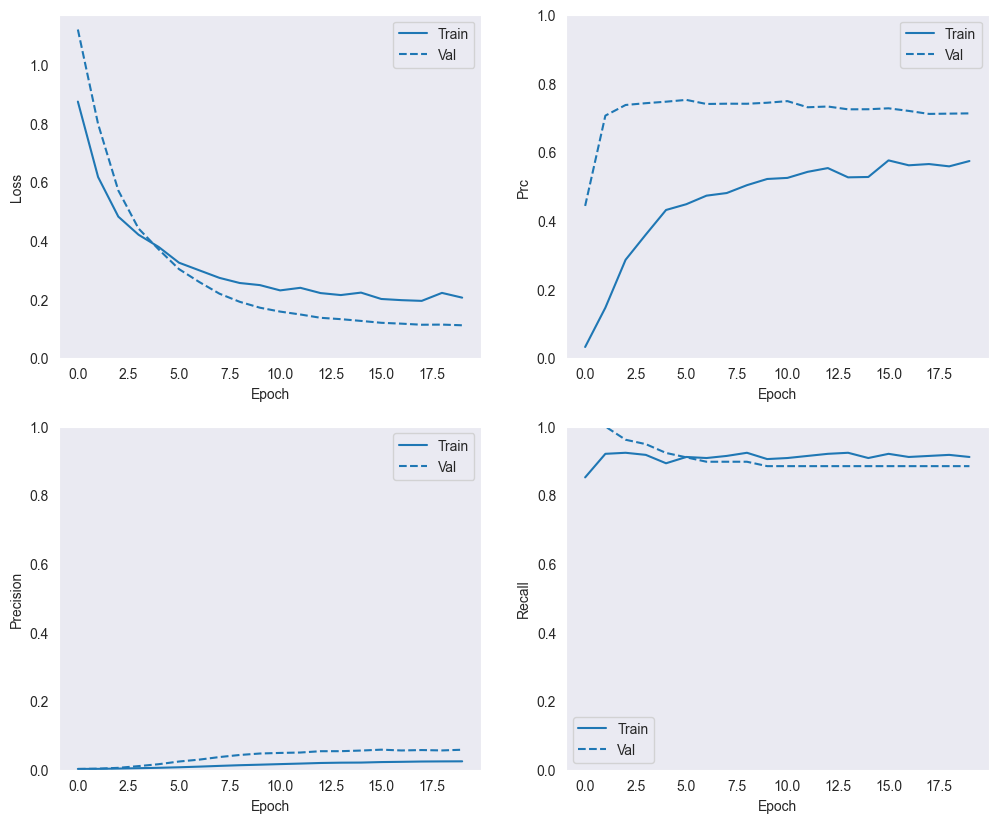

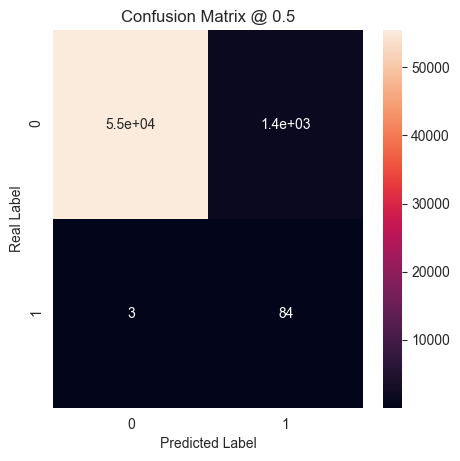

In [40]:
model_1 = make_model()
# class weights method ( weight the model parameters of the class with less data points)
weight_0 = (1/neg)*(pos + neg)/2
weight_1 = (1/pos)*(pos + neg)/2

weighted_model_history = model_1.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=1,
    class_weight={0: weight_0, 1:weight_1}
)
print(f"The weights of class 0 : {weight_0}")
print(f"The weights of class 1 : {weight_1}")

weighted_preds = model_1.predict(test_features)

plot_metrics(weighted_model_history)
plot_cm(test_labels, weighted_preds)

In [41]:
# TODO: We can also try to oversample the positive examples to make the number of data points of both the classes equal